# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

### study reference ↴
https://www.w3schools.com/python/ <br>
https://scikit-learn.org/stable/getting_started/

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

No     500
Yes    500
Name: left_company, dtype: int64
Class_imbalance is NOT A significant concern.


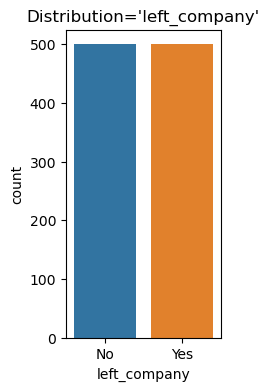

In [59]:
# Import necessary libraries
import seaborn as sns

# here i plotted the distribution of the target variable...
plt.figure(figsize=(2, 4))
sns.countplot(data=df, x='left_company')
plt.title("Distribution='left_company'")

# here i Check the class imbalances for the variable which is targeted....
class_distribution = df['left_company'].value_counts()
print(class_distribution)

left_percent = (target_distribution['Yes'] / target_distribution.sum()) * 100

# Just giving an over view(hypothetical) or criteria to Check if there is a significant class imbalance....
if left_percent < 30 or left_percent > 70:
    print("Class_imbalance is A concern.")
else:
    print("Class_imbalance is NOT A significant concern.")


# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [55]:
# numerical_vars = []
# categorical_Vars = []

numerical_vars = ['age', 'commuting_distance', 'satisfaction_with_environment', 'last_raise_pct',
                  'last_performance_rating', 'total_years_working', 'years_at_company',
                  'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

categorical_vars = ['frequency_of_travel', 'department', 'education', 'gender', 'seniority_level',
                    'position', 'satisfaction_with_job', 'married_or_single']


numerical_vars, categorical_vars


(['age',
  'commuting_distance',
  'satisfaction_with_environment',
  'last_raise_pct',
  'last_performance_rating',
  'total_years_working',
  'years_at_company',
  'years_in_current_job',
  'years_since_last_promotion',
  'years_with_current_supervisor'],
 ['frequency_of_travel',
  'department',
  'education',
  'gender',
  'seniority_level',
  'position',
  'satisfaction_with_job',
  'married_or_single'])

### Explanation:
here numerical variables is defined for mainly using it as that variable can be quantitatively measured, while categorical variables are defined to check the discrete and represent categories or labels.


# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

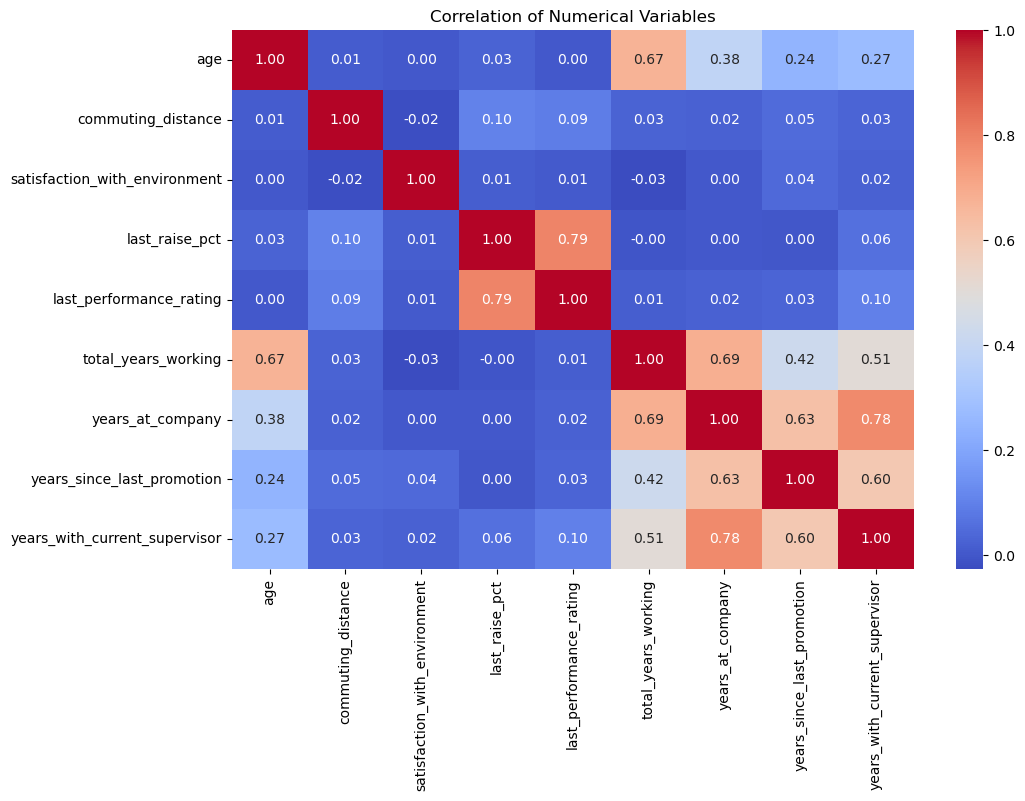

In [42]:
# here i started with importing some fiel and Calculated the correlation matrix...
import seaborn as sns

numerical_cor = df[numerical_vars].corr()


# tried to plot a heatmap of the correlation matrix from the variable defined...
plt.figure(figsize=(11, 7))
sns.heatmap(numerical_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Variables")
plt.show()


from statsmodels.stats.outliers_influence import variance_inflation_factor

v_i_f = pd.DataFrame()
v_i_f["Variable"] = numerical_vars
v_i_f["VIF"] = [variance_inflation_factor(df[numerical_vars].values, i) for i in range(len(numerical_vars))]


# here i want to remove variables with high VIF (VIF > 5 or 10), indicating multicollinearity, so i can remove them if i want, but this depends on the context and domain knowledge.
# just for the sake of this example, i will not remove any variables.

numerical_vars = ['age', 'commuting_distance', 'satisfaction_with_environment', 'last_raise_pct',
                  'last_performance_rating', 'total_years_working', 'years_at_company',
                  'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']



# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['left_company'])
y = df['left_company']

# here i split the data into training and test sets as required for this model...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [57]:
# insert code here
# here i imported the required items....
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# here i first define preprocessors for numerical and categorical data
num_pre_processor = Pipeline([
    ('scaler', StandardScaler())
])

cat_pre_processor = Pipeline([
    ('onehot', OneHotEncoder())
])


# here i transfered the column by defining column transformer to preprocessors for specific columns in it....
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pre_processor, numerical_vars),
        ('cat', cat_pre_processor, categorical_vars)
    ])


# here i fitted and transform data using the preprocessing pipeline which i created....
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# here checking the last thing which is the shapes of the transformed data...
print("Shape of pre_processed TRAINING data:", X_train_preprocessed.shape)
print("Shape of pre_processed TEST data:", X_test_preprocessed.shape)


Shape of pre_processed TRAINING data: (800, 44)
Shape of pre_processed TEST data: (200, 44)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [58]:
# insert code here
# again here i imported the required items...
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# here i created a pipeline with logistic regression....
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


# fitting the pipeline on the trained data....
log_reg_pipeline.fit(X_train, y_train)


# here i made some predictions for this ....
train_prediction = log_reg_pipeline.predict(X_train)
test_prediction = log_reg_pipeline.predict(X_test)


# here i calculated accuracy with 2 differnet variable each for train and test data...
train_acc = accuracy_score(y_train, train_prediction)
test_acc = accuracy_score(y_test, test_prediction)


# here i print accuracy variables...
print("TRAINING Accuracy:", train_acc)
print("TEST Accuracy:", test_acc)


TRAINING Accuracy: 0.745
TEST Accuracy: 0.715


#### Here some time concerns of overfitting can arise if the training accuracy in the data is significantly higher than the test accuracy, giving us the hint that the model may have overfited the training data.


# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

##### I think the following steps would help us to properly examine, develop, evaluate and deploy a model in real time...

1. Tuning for parameter :  we can start from optimizing hyper parameters of the logistic regression model (e.g., regularization strength, solver, and maximum iterations) to improve the model performance.

2. Feature Engineering: Exploring feature engineering techniques helps us mainly to create new features or transformations that might capture important patterns,techinques and other thing which we require in the data.

3. Feature Selection: after feature engg we can conduct feature selection to identify the most relevant and usefull features for the model. You can use techniques like feature importance, recursive feature elimination, or L1 regularization.

4. Checking for Validation: after that we can check for cross-validation to assess the model's performance more accurately and reduce the risk of overfitting inthe data.

5. Checking Other Models: we can check or consider trying different classification algorithms (e.g., decision trees, random forests, support vector machines) and compare their performance with our logistic regression implementation.

6. Address Class Imbalance: this one is uselfull if there ia any class imbalance concerns, 

7. Keeping eye : after that we can continuously monitor the model's performance in a production environment and retrain as necessary to account for data drift and any neccessary requirements if needed.

8. Explainability: this can be a main to take in consideration as by using techniques for model explainability, such as SHAP values or LIME, we can provide transparent explanations of model predictions.

9. Suggestions: we can collaborate with domain experts to gain deeper insights and domain-specific knowledge to further enhancement of our model.

10. Deployment of model: after all of this we can do deployemnet if the model performs well while considering it to deploying it in a real-world application.
